# Linear regression

Now that we've created our first learning machine model, let's see how it works under the hood.

In [1]:
import pandas as pd
import numpy as np

## How does it work?
Here comes a part that some of you fear: Mathematics!    

But don't worry, you'll see that it's not that complicated.

In this notebook, everytime we will talk about programming variables, we will format the names like `this`. 
For mathematical variables and functions, we'll be formatting them like $this$.

### How to calculate the y-axis from the x-axis?

A linear model is in fact based on a simple [affine function.](https://fr.wikipedia.org/wiki/Fonction_affine) !

$$f(x) = ax + b$$
or ...
$$y = f(x) = ax + b$$
or...

```py
y = a*x + b
```

**Exercise:** Create a function `f` which receives as a parameter the variables `x`,`a` and `b` and returns `y`.

In [2]:
def f(x,a,b):
    return a*x + b

This function will allow us to create a straight line that passes through all the points as well as possible. For the moment, we do not know the value of parameters $a$ and $b$, so it is impossible to draw a good straight line on the scatter plot, unless we choose parameters at random. And that is what we are going to do.


The linear model with random parameters would look something like this: 

![image.png](../assets/random_bias.png)

But we want to achieve this result:

![](../assets/trained_bias.png)

And it will be the role of the machine to learn how to find these values ($a$ and $b$) by minimizing the cost function that we will see in detail in the next chapter.

Before we do that, we need to look at the small problem we have with this method. The function as written above only take one element, $x$. However, in the next sections, we are going to have multiple values for $x$, in a vector $X$. We'll thus denote a single item with an index $i$, like $x^{i}$. If we execute the function as is, we would have to make a loop for each element $x^{i}$ of our dataset. 

$$
X = 
\begin{bmatrix}
x^{(1)}\\
x^{(2)}\\
x^{(3)}\\
... \\
x^{(m)}\\
\end{bmatrix}
$$

This can be very expensive in terms of machine resources. If your dataset is very large, it will take a lot of time to train your model. 

To solve this problem, it is customary to use something you are beginning to know, matrices! 

The matrices allow us to perform the function only once on our entire dataset. 

The matrix writing of $f(x)=ax+b$ is written like this:
$$ F = X \cdot \theta$$

As these are matrices that contain all the data, by convention, we put them in uppercase.

The variable $F$ will contain a matrix with the set of predictions of $x^{(i)}$. 

$$ 
F \\
\begin{bmatrix}
f(x^{(1)})\\
f(x^{(2)})\\
f(x^{(3)})\\
... \\
f(x^{(m)})\\
\end{bmatrix}
$$

The variable $\theta$ (pronounced theta) will contain a vector with the values $a$ and $b$.

$$
\theta \\
\begin{bmatrix}
a \\
b \\
\end{bmatrix}
$$

The variable $X$ will contain a matrix with two dimensions, one dimension with the value of $x^{(i)}$ and another dimension with 1's everywhere.  Why? Because we have to multiply our $X$ and $\theta$ matrices. Remember [matrix multiplication](https://www.mathsisfun.com/algebra/matrix-multiplying.html)?
$$ 
\begin{equation*}
\begin{bmatrix}
x^{(1)} && 1\\
x^{(2)} && 1\\
x^{(3)} && 1\\
... \\
x^{(m)} && 1\\
\end{bmatrix}
\cdot
\begin{bmatrix}
a \\
b \\
\end{bmatrix}
\end{equation*}
$$

![](../assets/dot_mat.jpg)

Which amounts to writing this for $y^{(1)}$ (and for every other $y^{(i)}$): 
$$ y^{(1)} = x^{(1)}* a + 1 * b$$

And if we simplify:
$$ y^{(1)} = ax^{(1)} + b$$


So we are back to our original function.


**Exercise:**
1. Create a variable `X` which contains a matrix of shape `(30,2)` with a column filled with values of our dataframe (the same as the first notebook) and then another one with 1's. 
2. Create the `theta` variable which contains a vector with 2 random values.
3. Create a variable `F` which contains a multiplication of the matrix `X` with the `theta` vector.

In [6]:
df = pd.read_csv("../data/salary_data.csv")

x = df.drop(columns=["Salary"]).to_numpy()
y = df.Salary.to_numpy().reshape(-1 , 1)

X = np.hstack((x, np.ones(x.shape)))
np.random.seed(0) 
theta = np.random.randn(2, 1)

F = X.dot(theta)

In [7]:
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)
print("Shape of F: ", F.shape)

Shape of X:  (30, 2)
Shape of y:  (30, 1)
Shape of F:  (30, 1)


**Exercise:** Create a `model` function that receives as parameter `X` and `theta`.  The function must compute and return `F`. 

In [4]:
def model(X, theta):
    return X.dot(theta)

**Exercise:** Create a `y_pred` variable, call the `model` function with `X` and  `theta` and assign it to `y_pred`.

In [8]:
y_pred = model(X, theta)
print("Shape of y_pred: ", y_pred.shape)

Shape of y_pred:  (30, 1)


Now we know how to apply our model to our entire dataset. Now we have to know how to find the right values for $a$ and $b$. For that we will have to calculate the average of all our errors with a cost function.

### Cost function

The cost function allows us to evaluate the performance of our model by measuring the errors between the prediction and the actual value. The question we ask ourselves is: How to measure these errors?

Imagine that you have 4 years of experience and that you earn $110000€$ per year. Your machine learning model predicts that this salary is worth $€90000$. You can conclude that your model therefore makes an error of $90000 - 110000 = -20000 €$.

Thus, you could say that to measure your errors, you have to calculate the difference $f(x)-y$. However, if your prediction $f(x)$ is less than $y$, then this error is negative (as in the example above), and it is not very practical to minimize this function.

So, to measure the errors between the $f(x)$ predictions and the target values $y$ of the dataset, we calculate the square of the difference: $(f(x)-y)^2$. This, by the way, is what is called the Euclidean norm, which represents the direct distance between $f(x)$ and $y$ in Euclidean geometry.




![image.png](../assets/eucli.JPG)

But this is not enough. Indeed, we have the error of a single example. But we must have the average of all the errors of all the points. 

We could write it like this: 



$$MSE(a,b) = {\dfrac{(f(x^{(1)})- y^{(1)})^2 + (f(x^{(2)})- y^{(2)})^2  + ... +(f(x^{(m)})- y^{(m)})^2}{m}}$$

Why $MSE$? Because this function is called **Mean Squared Error**

By convention this function is written in the following way, adding a coefficient $\frac{1}{2}$ to simplify a derivative calculation that will come later.

$$ MSE(a, b) = {\dfrac{1}{2m}} \sum _ {i=1}^m (f(x^{(i)}) - y^{(i)})^2$$

Or

$$ MSE(a, b) = {\dfrac{1}{2m}} \sum _ {i=1}^m (ax^{(i)} +b - y^{(i)})^2$$


But as we work with matrices, we also have to transcribe our formula which becomes: 

$$MSE(\theta) = \frac {1}{2m}  \sum (X \cdot \theta - Y)^2$$

or something **similar** to this: 

```py
MSE = 1/(2*m) * sum((X * theta - y)**2)
```

**Exercise:** Create a `MSE` function that receives as parameter `X, y and theta` using the example above.

In [12]:
def MSE(X,y, theta):
    m = len(y)
    y_pred = model(X,theta)
    return 1/(2*m) * np.sum(y_pred - y)**2

In [13]:
error = MSE(X,y,theta)
print(error)

86624557893.95943


### Minimize the cost function

If the cost function is omitted with respect to the parameter, it looks something like this:

![image.png](../assets/convexe.png)

The aim is therefore to reach the lowest point of the curve, i.e. the lowest possible sum of errors. 

![image.png](../assets/gradient_descent.png)

To do this, there are several function minimization algorithms, such as the least squares method or **gradient descent**. We will focus here on gradient descent because it is one of the most widely used.

Gradient descent is an iterative algorithm which therefore proceeds by progressive improvements. For a linear problem, this algorithm needs to have two hyper-parameters:

**1. The number of iterations:** As its name indicates, this is the parameter that will determine the number of iterations.

**2. The learning rate:** This is the length of the step between each iteration. 

![learningrate](../assets/gradient_descent_1.gif)

It is important to clearly define the learning rate. If you set a high value, the algorithm will be faster, but you risk never reaching the lowest point of the curve, the steps being too big. Our model will never be able to work since it cannot find the minimum of the cost function.

![](../assets/gradient_descent_2.gif)

Conversely, if you set a small value, then the algorithm will find the lowest point of the curve, but it will be slower.

![learning rate](../assets/gradient_descent_3.gif)

At each iteration, we will have to calculate the regression slope.

![](../assets/derivative.gif)

And in mathematics we calculate a slope with a [partial derivative](https://en.wikipedia.org/wiki/Partial_derivative#:~:text=In%20mathematics%2C%20a%20partial%20derivative,vector%20calculus%20and%20differential%20geometry.). The symbol used to denote partial derivatives is $\partial$. 

$$ \frac {\partial MSE(\theta) }{\partial \theta}  = \frac {1}{m} X^T \cdot (X \cdot \theta - Y)$$

The  $^T$ in $X^T$ is to transpose the matrix, just like in numpy.

You could translate this into code like this:

```py
1/m * X.T.dot(model(X, theta) - y)
```



In [14]:
def grad(X, y, theta):
    m = len(y)
    y_pred = model(X, theta)
    return 1/m * X.T.dot(y_pred - y)

We still have to write the gradient descent. 

$$\theta = \theta - \eta *  \frac {\partial MSE(\theta) }{\partial \theta}$$

The variable $\eta$ is the learning rate. So at each iteration, we redefine $\theta$. We do: `theta` - `learning_rate` multiplied by the partial derivative of mean squared error. You could translate this into code like this:

```py
theta = theta - learning_rate * grad(X, y, theta)
```

**Exercise:**
1. Create a `gradient_descent` function that receives as parameter `X`, `y`, `theta`, `learning_rate` and `n_iterations`.
2. In the function, create a variable `cost_history` with a matrix filled with 0 and which has a length of `n_iterations`. We will use it to display the plot of the model learning process.
3. Create a loop that iterates up to `n_iterations`.
4. In the loop, update `theta` with the formula of the gradient descent (the example above).
5. In the loop, update `cost_history[i]` with the values of `MSE(X,y,theta)`.
6. return `theta` and `cost_history`.

In [15]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations)
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) 
        cost_history[i] = MSE(X, y, theta) 
        
    return theta, cost_history

### Train your model

Now that we know which algorithm is used to minimize the cost function, we train our model.   
We define a number of iterations, and a learning step $\alpha$, and here we go!

Once the model is trained, we observe the results compared to our dataset.

**Exercise:** Create variables `n_iterations` and `learning_rate`. 
The learning rate and the number of iterations are defined by trying around a little bit. You have to try several things, there is no magic number. However, starting with 1000 iterations and a learning rate of 0.01 is a good basis to start training.

In [18]:
n_iterations = 1000
learning_rate = 0.01

**Exercise:** Create variables `theta_final`, `cost history` and call `gradient_descent()`.

In [19]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
print(theta_final)

[[ 9876.11033506]
 [22920.50184159]]


**Exercise:** 
1. Create a `predictions` variable that will store the result of `model(X, theta_final)`.
2. Use matplotlib to display a scatter plot with the data and the target.
3. On the same graph, use the `plot` method to display your predictions. 

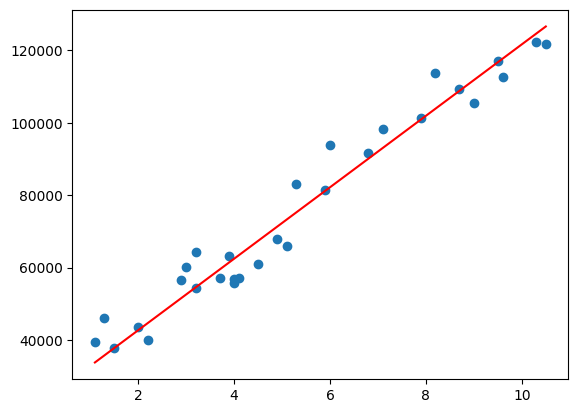

In [20]:
import matplotlib.pyplot as plt
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

You should have something like this:

![](../assets/final_theta.png)

If not, change the learning rate and the number of iterations.

### Learning curves
To check if our gradient descent algorithm worked well, we observe the evolution of the cost function through iterations. We are supposed to obtain a curve that decreases with each iteration until it stagnates at a minimal level (close to zero). If the curve does not follow this pattern, then the learning rate may be too high, we should take a smaller step.

**Exercise:** 
1. Plot the `cost_history` with respect to the number of iterations.

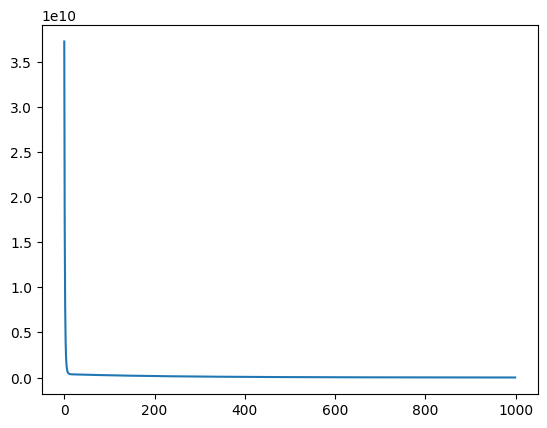

In [21]:
plt.plot(range(n_iterations), cost_history)

You should have something like this:

![](../assets/learning_curve.png)

On this plot, we can see that after 400 iterations, the model no longer learns and becomes constant. We can thus redefine the maximum number of iterations to 400.

### Evaluation

To evaluate the real performance of our model with a popular metric (for your boss, client, or colleagues) we can use the coefficient of determination, also known as $R^2$. It comes from the method of least squares. The closer the result is to 1, the better your model is.

In [22]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [23]:
coef_determination(y, predictions)

np.float64(0.9545027396203364)

### The end
Ok ok, you just built your own model of linear regression, do you realize that? 
This part was a bit theoretical, but it's essential to understand how it works.

![tired.gif](../assets/tired.gif)

# Multiple linear regression

You will see that with matrices, the multiple linear regression case also doesn't change much in the way of proceeding. The matrix writing remains very similar.

## Data

First of all, we will load our dataset. This is a fake dataset for the example. 

In [31]:
df = pd.read_csv("../data/data_multi.csv")
df

,x_1,x_2,y
0,1.054452,-1.070753,-81.464433
1,-0.362741,-0.634322,-78.752795
2,-0.854096,0.313068,2.218414
3,1.326386,0.298238,52.234160
4,-0.461585,-1.315907,-159.639258
...,...,...,...
95,0.823504,0.771791,86.316340
96,0.976639,0.208275,83.136943
97,-1.347759,1.883151,157.404615
98,0.052165,-1.104383,-136.511136


In [28]:
df.shape

(30, 2)

As you can see we now have 100 rows, 2 features and 1 target.

### Transform to matrix

$$
\\ Y = X \cdot \theta \\
$$
The $Y$ vector is the same too
$$ Y =
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
$$

The $X$ matrix will have as many dimensions as there are features +1  (n+1)

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, ..., x^{(1)}_{n}, 1\\
x^{(2)}_1, x^{(2)}_2, ..., x^{(2)}_{n}, 1\\
x^{(3)}_1, x^{(3)}_2, ..., x^{(3)}_{n}, 1\\
x^{(m)}_1,x^{(m)}_2, ..., x^{(m)}_{n}, 1\\
\end{bmatrix}
$$

The theta vector will have as many lines as there are parameters +1 (for the constant). 
$$ \theta =
\begin{bmatrix}
a\\
b\\
c\\
... \\
\end{bmatrix}
$$

For our case with our dataset, we can write it like this: 

$$
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
=
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, 1\\
x^{(2)}_1, x^{(2)}_2, 1\\
x^{(3)}_1, x^{(3)}_2, 1\\
x^{(m)}_1,x^{(m)}_2,  1\\
\end{bmatrix}
\cdot
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
$$

**Exercise:** Create a variable `X` which contains a matrix of shape `(100,3)` with two column's filled with values of our dataframe and then another one with 1's.

In [32]:
features = df.drop(columns=["y"]).to_numpy()
ones = np.ones((X.shape[0],1))
X = np.hstack((features, ones))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 100 and the array at index 1 has size 30

**Exercise:** Check that your matrix is of shape `(100,3)`. 

In [ ]:
X.shape

**Exercise:** Create the theta vector with three random values. Your vector must be of shape 
`(3,1)`.

In [ ]:
theta = np.random.rand(3).reshape(-1, 1)
print(theta)
print(theta.shape)

## Create and fit the model
### Define your model

**Exercise:** Create a `model` function that receives as parameter `X` and `theta`. The function must return the computed predictions `y_pred`. This is exactly the same model as last time.

In [ ]:
def model(X, theta):
    return X.dot(theta)

### Cost function

Well we have the model, the $\theta$ vector, the $X$ matrix. What are we missing? The cost function of course!
And you know what? This too is exactly the same MSE function from last time. 

$$MSE(\theta) = \frac {1}{2m}  \sum (X \cdot \theta - Y)^2$$

**Exercise:** Create a MSE function that receives as parameters `X`, `y` and `theta` using the example above.

In [33]:
def MSE(X,y, theta):
    m = len(y)
    y_pred = model(X,theta)
    return 1/(2*m) * np.sum((y_pred - y)**2)

In [34]:
error = MSE(X,y,theta)
print(error)

3250605125.7921824


### Gradient descent
It's time to find the minimum of our function. Well again, nothing changes compared to the last time. 

$$ \frac {\partial MSE(\theta) }{\partial \theta}  = \frac {1}{m} X^T \cdot (X \cdot \theta - Y)$$

**Exercise:** Create a `grad` function that receives as parameter `X`, `y`, `theta`.

In [ ]:
def grad(X, y, theta):
    m = len(y)
    y_pred = model(X, theta)
    return 1/m * X.T.dot(y_pred - y)

**Exercise:**

1. Create a `gradient_descent` function that receives as parameter `X`, `y`, `theta`, `learning_rate`, `n_iterations`.
2. In the function, create a variable `cost_history` with a matrix filled with 0 and which has a length of `n_iterations`. We will use it to display the histogram of the model learning process.
3. Create a loop that iterates up to `n_iterations`.
4. In the loop, update `theta` with the formula of the gradient descent (the example above).
5. In the loop, update `cost_history[i]` with the values of `MSE(X,y,theta)`.
6. return `theta` and `cost_history`.

In [ ]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) 
        cost_history[i] = MSE(X, y, theta) 
    return theta, cost_history

### Train your model 

**Exercise:** Create variables `n_iterations` and `learning_rate`.

In [ ]:
n_iterations = 1000
learning_rate = 0.01

**Exercise:** Create variables `theta_final`, `cost_history` and call `gradient_descent()`.

In [ ]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
print(theta_final)

**Exercise:** 
Create a `predictions` variable that contains `model(X, theta_final)`.



In [ ]:
predictions = model(X, theta_final)

**Exercise:** Plot your predictions in 3D and the true values of the dataset.

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(180, 180)
ax.scatter(X[:,0], X[:,1], y)
ax.scatter(X[:,0], X[:,1], predictions)

**Exercise:** Plot `cost_history`.

In [ ]:
plt.plot(range(len(cost_history)), cost_history)

### Evaluation

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
coef_determination(y, predictions)

### Congratulations!

You are now able to create a multiple variable regression model from scratch, well, from the matrix!

<img src="https://media.giphy.com/media/W9lzJDwciz6bS/giphy.gif">